# Creating a Gradio Web-based Application Powered by an AI Model

## What do we have?

1. A model that takes an image as an input and returns a label/category.
2. A space on Hugging Face that can host this model and let people interact with it on the web.

## What do we need to do next?

1. Modify the `app.py` file for the Hugging Face repository to work with the model.
2. Possibly collect some additional information about the categories that the model works for. Do you really want it to just return one word?
3. Customize the Gradio application.

## Creating code for the `app.py` script to use the model

There is a helpful notebook in the `Deep Learning - Computer Vision` unit we just completed called `app.ipynb`. It can be found in `/workspace/notebooks/` and will use the data used to create the model, and the model, to generate a usable script that can be used in the Gradio application.

I will walk through the process of creating the `app.py` script that we will need, so that if you need it in the future, you will be able to do so.

Testing code before putting it into production is a good software engineering process, so let's do that now.

## The new `app.py` code:

In [ ]:
__all__ = ['path_to_pkl_model', 'learn', 'categories', 'image', 'label', 'intf', 'classify_image']

from fastai.vision.all import *
import gradio as gr

path_to_pkl_model = 'model-resnet-5epoch.pkl' # change this filename to the model that you intend to use

learn = load_learner(path_to_pkl_model) # create a learner variable from the .pkl model

categories = learn.dls.vocab # learn.dls.vocab provides the categories from our trained model

# define a function that will take an image as input and output a dictionary of probabilities of matching categories
def classify_image(img):
    img = PILImage.create(img).resize((192, 192))
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

# these are elements within the gradio application that will appear in the application
image = gr.Image() # set the image variable to a gradio.image() input element (a place to capture/put images)
label = gr.Label() # set the label variable to a gradio.label() output element (a place to output the categories)

# finally, create a gradio.interface() element that uses the classify_image function
# the classify_image function gets the inputted image from the image variable/elemtn, and outputs the dictionary result to the label variable/element
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label)
intf.launch(inline=False)

## What you need to do:

1. Use the code above in the `app.py` for your Hugging Face Gradio application. Copy and paste the code into that file, removing all previous code.

1. Copy the `.pkl` model file that you want to use into the folder with the `app.py` script. Then rename the `path_to_pkl_model` variable to be that name of the `.pkl`. The example code above assumes that the model filename is `model-resnet-5epoch.pkl`.

1. Create a new file in the `indigigenius-model-app` folder called `requirements.txt`. The only thing that needs to be in `requirements.txt` is the word 'fastai'. `requirements.txt` tells the hugging face space what python packages to use. Since the `app.py` script has an import from `fastai` it must be installed first. Gradio does not need to be in this file since this is already in a Gradio space and it already exists.

Once these steps are completed, the VS Code explorer and `requirements.txt` file should look like the image below.  

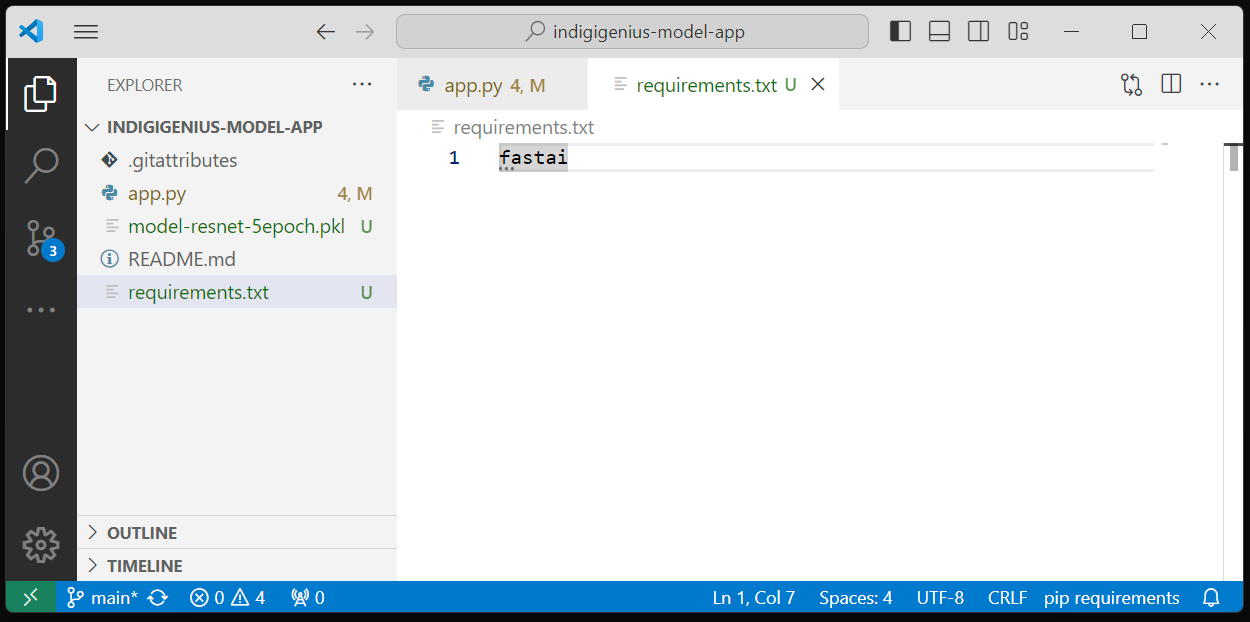

Notice that the ***Source Control*** tab on the far left has the number 3 on it. This indicates that there are 3 files that need to be commited to the repository and synced.

Now that you have made the changes, use the source control panel to commit the changes. 

***DO NOT FORGET TO INCLUDE A MESSAGE WITH THE COMMIT, VS CODE WILL HANG UP. TO RECOVER, MAKE SURE YOUR FILES ARE SAVED, CLOSE VS CODE, AND REOPEN IT.***

## Dealing with errors:

If your model used a pretrained model from the Pytorch Image Models library (`timm`), you may need to include 'timm' in the `requirements.txt` file and include an import statement in the `app.py` script. You will have an error when building the application on Hugging Face in the log telling you this is needed if that is the case.

An image of what `requirements.txt` should have is below and the code with the import statement is in the next cell.  
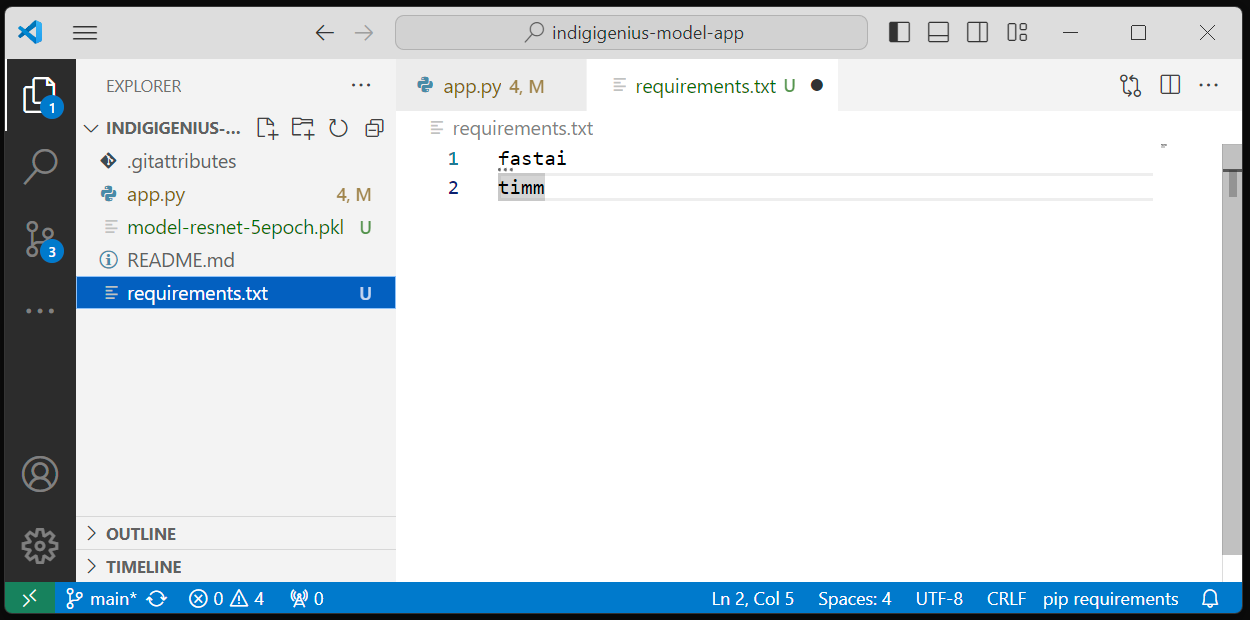

In [ ]:
__all__ = ['path_to_pkl_model', 'learn', 'categories', 'image', 'label', 'intf', 'classify_image']

from fastai.vision.all import *
import timm # add this if you need to
import gradio as gr

path_to_pkl_model = 'model-resnet-5epoch.pkl' # change this filename to the model that you intend to use

learn = load_learner(path_to_pkl_model) # create a learner variable from the .pkl model

categories = learn.dls.vocab # learn.dls.vocab provides the categories from our trained model

# define a function that will take an image as input and output a dictionary of probabilities of matching categories
def classify_image(img):
    img = PILImage.create(img).resize((192, 192))
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

# these are elements within the gradio application that will appear in the application
image = gr.Image() # set the image variable to a gradio.image() input element (a place to capture/put images)
label = gr.Label() # set the label variable to a gradio.label() output element (a place to output the categories)

# finally, create a gradio.interface() element that uses the classify_image function
# the classify_image function gets the inputted image from the image variable/elemtn, and outputs the dictionary result to the label variable/element
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label)
intf.launch(inline=False)